# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [125]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\migue\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [126]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [127]:
# df = pd.read_fwf(dataset_path, names= column_names)
# Origin representa USA (1), Europa (2), Asia (3) 
df = pd.read_csv(dataset_path, names= column_names, delim_whitespace=True) # na_values=['?']
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [129]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Limpia los datos

Trata los missings y variables categóricas

In [131]:
df['Horsepower'].astype('float')

ValueError: could not convert string to float: '?'

In [133]:
df['Horsepower'][df['Horsepower'] == '?'] = np.nan

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [137]:
df['Horsepower'] = df['Horsepower'].astype('float')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [140]:
df[df['Horsepower'].isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [142]:
df = df.fillna(df['Horsepower'].mean())

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [146]:
df['Car Name'].nunique()

305

In [150]:
df['Car Name'][df['Car Name'].str.contains('renault')]

79          renault 12 (sw)
186            renault 12tl
218           renault 5 gtl
330    renault lecar deluxe
354             renault 18i
Name: Car Name, dtype: object

In [151]:
df.drop(columns= 'Car Name', inplace= True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [155]:
df['Origin'] = df['Origin'].astype(str)

In [157]:
df = pd.get_dummies(df)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin_1      398 non-null    uint8  
 8   Origin_2      398 non-null    uint8  
 9   Origin_3      398 non-null    uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 23.1 KB


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [159]:
from sklearn.model_selection import train_test_split

In [161]:
X = df.drop(columns= 'MPG')
Y = df['MPG']

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 42)

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

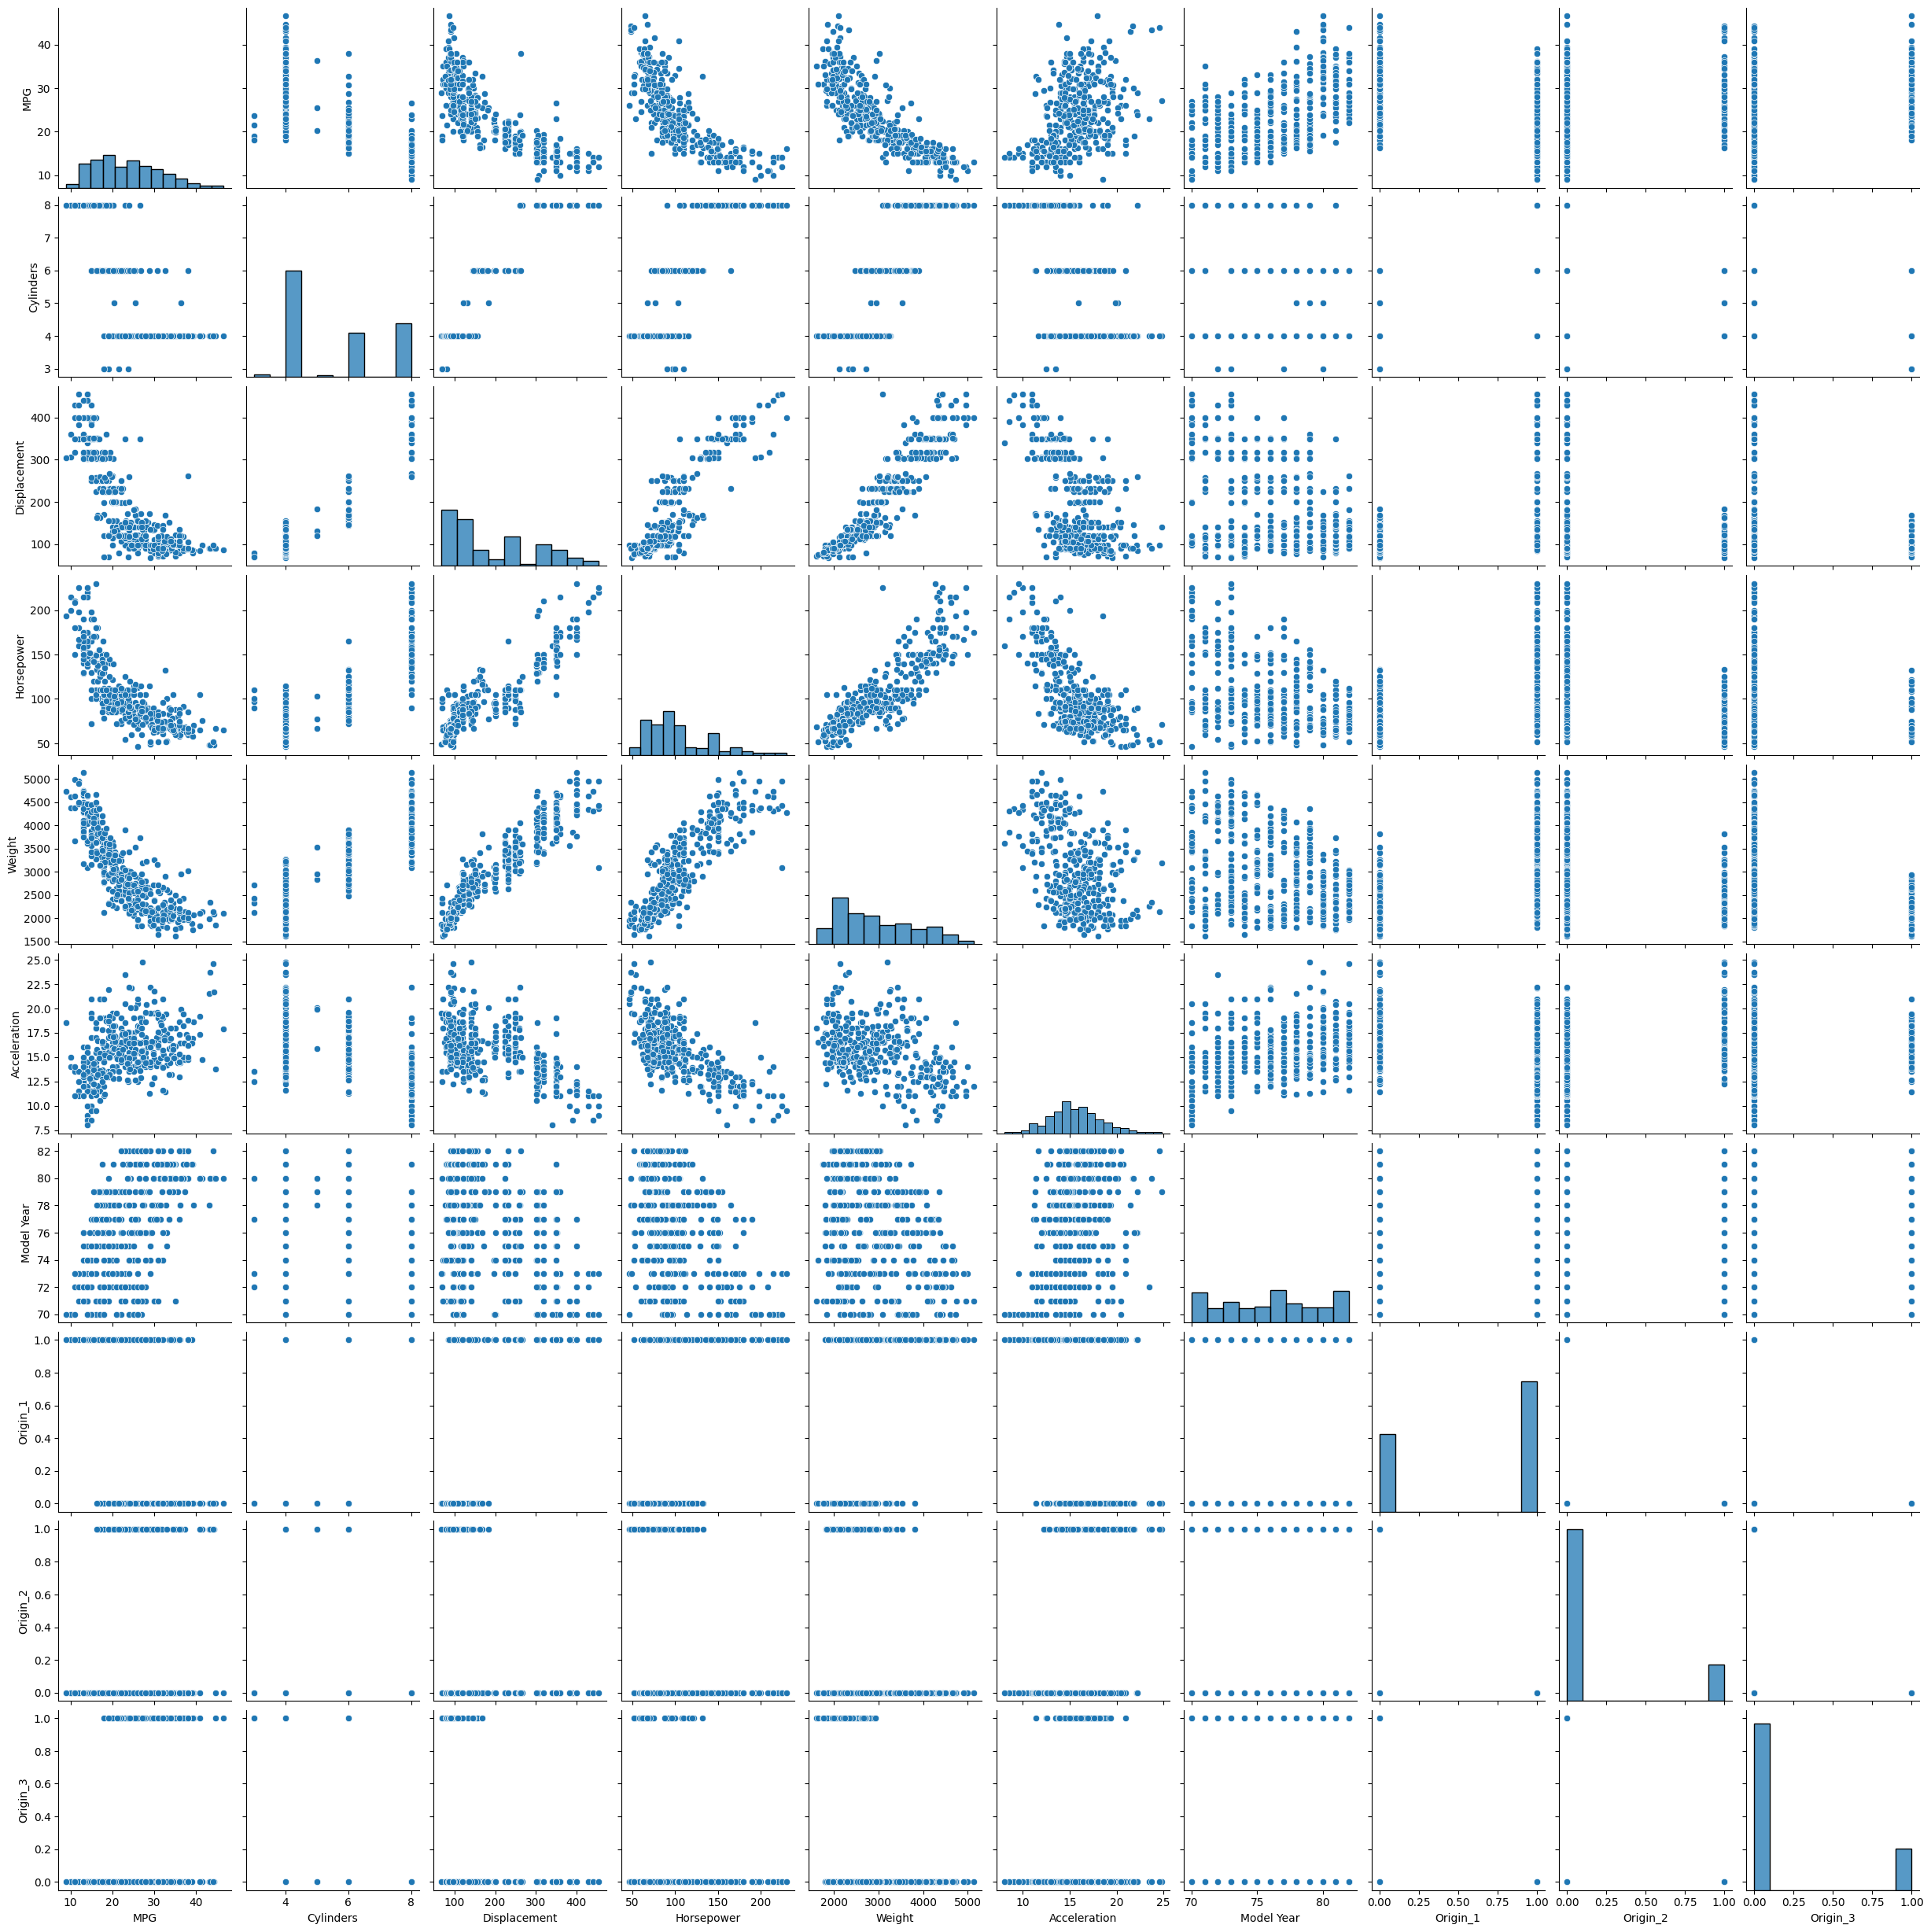

In [163]:
sns.pairplot(df)

<AxesSubplot:>

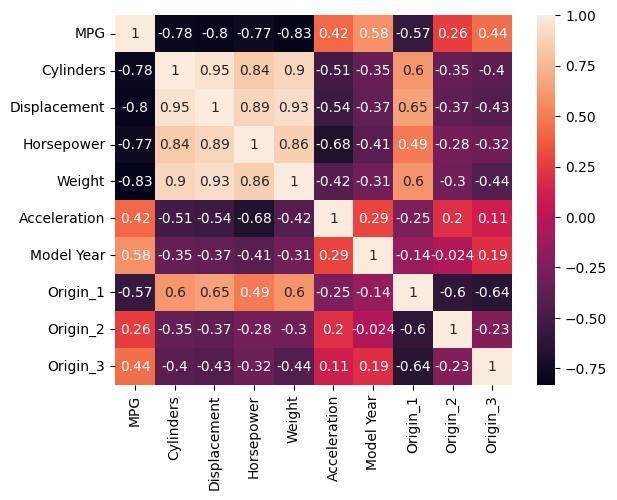

In [166]:
sns.heatmap(df.corr(), annot= True)

Tambien revise las estadisticas generales:

In [165]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### Separa las features del target

Separe el target de las features.

In [ ]:
#Hecho

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [167]:
from sklearn.preprocessing import StandardScaler

In [169]:
scaler = StandardScaler().fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [195]:
X_train_scal[0].shape

(9,)

In [196]:
capas = [keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train_scal[0].shape),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1)]

model = keras.Sequential(capas)

In [197]:
model.compile(loss = 'mse', optimizer = keras.optimizers.RMSprop(0.001), metrics = ['mae', 'mse'])

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [179]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                300       
                                                                 
 dense_16 (Dense)            (None, 15)                465       
                                                                 
 dense_17 (Dense)            (None, 1)                 16        
                                                                 
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [181]:
(30 * 9) + 30

300

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [182]:
history = model.fit(X_train_scal, Y_train, validation_split= 0.20, epochs= 1000)

Epoch 1/1000
8/8 [==============================] - 1s 32ms/step - loss: 565.2981 - mae: 22.5617 - mse: 565.2981 - val_loss: 552.6872 - val_mae: 22.4030 - val_mse: 552.6872
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 542.9792 - mae: 22.1157 - mse: 542.9792 - val_loss: 532.7381 - val_mae: 21.9903 - val_mse: 532.7381
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 523.1953 - mae: 21.7022 - mse: 523.1953 - val_loss: 512.7968 - val_mae: 21.5661 - val_mse: 512.7968
Epoch 4/1000
8/8 [==============================] - 0s 11ms/step - loss: 502.3518 - mae: 21.2646 - mse: 502.3518 - val_loss: 491.1539 - val_mae: 21.0969 - val_mse: 491.1539
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 479.2078 - mae: 20.7691 - mse: 479.2078 - val_loss: 467.5660 - val_mae: 20.5735 - val_mse: 467.5660
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 454.7832 - mae: 20.2241 - mse: 454.7832 - val_loss: 443.3221 - val

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [206]:
history_df = pd.DataFrame(history.history)

In [187]:
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,565.298096,22.561720,565.298096,552.687195,22.402994,552.687195
1,542.979248,22.115688,542.979248,532.738098,21.990261,532.738098
2,523.195312,21.702219,523.195312,512.796753,21.566109,512.796753
3,502.351807,21.264648,502.351807,491.153870,21.096928,491.153870
4,479.207825,20.769112,479.207825,467.565979,20.573532,467.565979
...,...,...,...,...,...,...
995,5.328499,1.599127,5.328499,6.538142,2.078125,6.538142
996,5.312582,1.612247,5.312582,6.419563,2.034925,6.419563
997,5.300374,1.583044,5.300374,6.348741,1.995091,6.348741
998,5.316878,1.614179,5.316878,6.429047,2.019913,6.429047


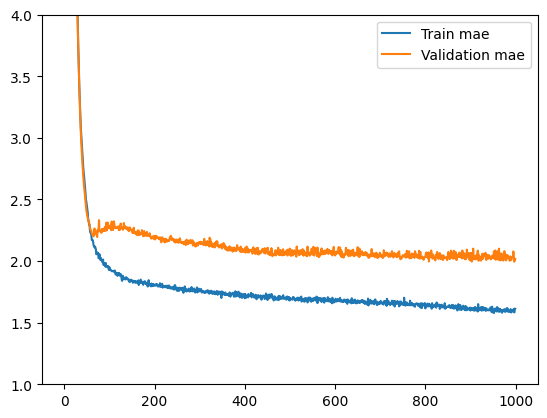

In [199]:
plt.plot(history_df['mae'], label = 'Train mae')
plt.plot(history_df['val_mae'], label = 'Validation mae')
plt.ylim(1, 4)
plt.legend();

¿Alguna conclusión respecto a este gráfico?

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

In [200]:
capas = [keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train_scal[0].shape),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1)]

model = keras.Sequential(capas)

model.compile(loss = 'mse', optimizer = keras.optimizers.RMSprop(0.001), metrics = ['mae', 'mse'])

history = model.fit(X_train_scal, Y_train, validation_split= 0.20, epochs= 30)

Epoch 1/30
8/8 [==============================] - 1s 36ms/step - loss: 643.2684 - mae: 24.0084 - mse: 643.2684 - val_loss: 634.7274 - val_mae: 23.9424 - val_mse: 634.7274
Epoch 2/30
8/8 [==============================] - 0s 10ms/step - loss: 625.8726 - mae: 23.6215 - mse: 625.8726 - val_loss: 621.3369 - val_mae: 23.6428 - val_mse: 621.3369
Epoch 3/30
8/8 [==============================] - 0s 12ms/step - loss: 612.7702 - mae: 23.3198 - mse: 612.7702 - val_loss: 608.2457 - val_mae: 23.3527 - val_mse: 608.2457
Epoch 4/30
8/8 [==============================] - 0s 11ms/step - loss: 599.6427 - mae: 23.0199 - mse: 599.6427 - val_loss: 594.8977 - val_mae: 23.0544 - val_mse: 594.8977
Epoch 5/30
8/8 [==============================] - 0s 10ms/step - loss: 586.5005 - mae: 22.7192 - mse: 586.5005 - val_loss: 581.4069 - val_mae: 22.7528 - val_mse: 581.4069
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 573.0900 - mae: 22.4101 - mse: 573.0900 - val_loss: 567.5903 - val_mae: 22

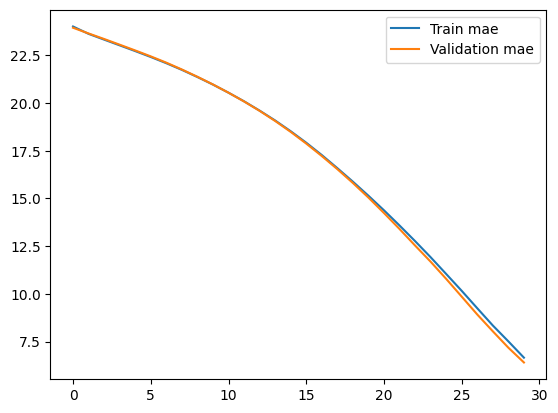

In [203]:
plt.plot(history_df['mae'], label = 'Train mae')
plt.plot(history_df['val_mae'], label = 'Validation mae')
plt.legend();

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

In [205]:
capas = [keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train_scal[0].shape),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1)]

model = keras.Sequential(capas)

model.compile(loss = 'mse', optimizer = keras.optimizers.RMSprop(0.001), metrics = ['mae', 'mse'])

history = model.fit(X_train_scal, Y_train, validation_split= 0.20, epochs= 1000, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 629.9519 - mae: 23.7941 - mse: 629.9519 - val_loss: 621.7968 - val_mae: 23.7630 - val_mse: 621.7968
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 613.6857 - mae: 23.4802 - mse: 613.6857 - val_loss: 608.0883 - val_mae: 23.4966 - val_mse: 608.0883
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 600.2015 - mae: 23.2223 - mse: 600.2015 - val_loss: 595.6227 - val_mae: 23.2531 - val_mse: 595.6227
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 588.1398 - mae: 22.9881 - mse: 588.1398 - val_loss: 584.0491 - val_mae: 23.0252 - val_mse: 584.0491
Epoch 5/1000
8/8 [==============================] - 0s 13ms/step - loss: 576.5992 - mae: 22.7608 - mse: 576.5992 - val_loss: 572.3146 - val_mae: 22.7936 - val_mse: 572.3146
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 564.5378 - mae: 22.5207 - mse: 564.5378 - val_loss: 559.9116 - v

Interpreta el gráfico

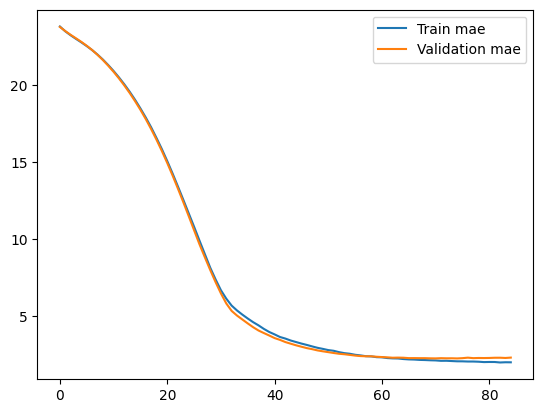

In [207]:
plt.plot(history_df['mae'], label = 'Train mae')
plt.plot(history_df['val_mae'], label = 'Validation mae')
plt.legend();

Observamos que el entrenamiento a pesar de tener 1000 epochs ha sido detenido debido a que el error en validación ya no conseguía una mejora y por lo tanto evitamos un posible overfitting.

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [208]:
model.evaluate(X_test_scal, Y_test)

3/3 [==============================] - 0s 4ms/step - loss: 5.1011 - mae: 1.7464 - mse: 5.1011


[5.101057052612305, 1.7463518381118774, 5.101057052612305]

Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [213]:
y_test_10 = model.predict(X_test_scal[:10])

1/1 [==============================] - 0s 35ms/step


In [218]:
y_test_10 = y_test_10.reshape(-1)

In [212]:
Y_test[:10]

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
84     27.0
373    24.0
94     13.0
222    17.0
126    21.0
Name: MPG, dtype: float64

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

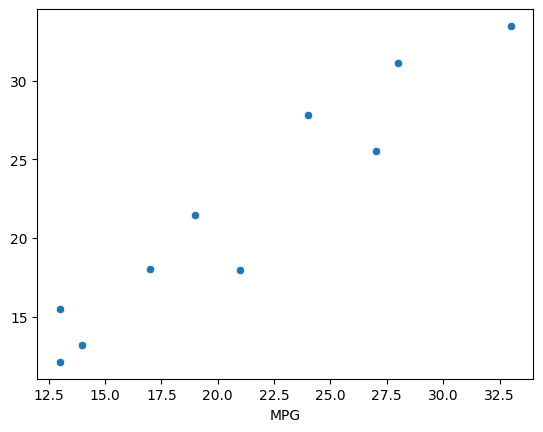

In [220]:
sns.scatterplot(x = Y_test[:10], y = y_test_10);

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

In [221]:
resid = Y_test[:10] - y_test_10

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


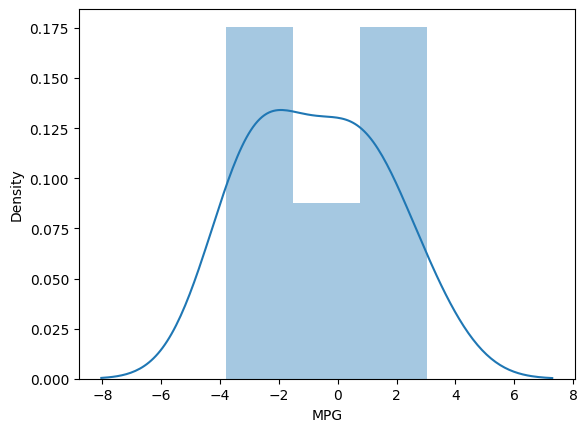

In [224]:
sns.distplot(resid);

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [225]:
model.save("reg_model.h5")

In [226]:
model_loaded = keras.models.load_model('reg_model.h5')

In [227]:
model_loaded.evaluate(X_test_scal, Y_test)

3/3 [==============================] - 0s 6ms/step - loss: 5.1011 - mae: 1.7464 - mse: 5.1011


[5.101057052612305, 1.7463518381118774, 5.101057052612305]

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.